Accuracy: 48.03%


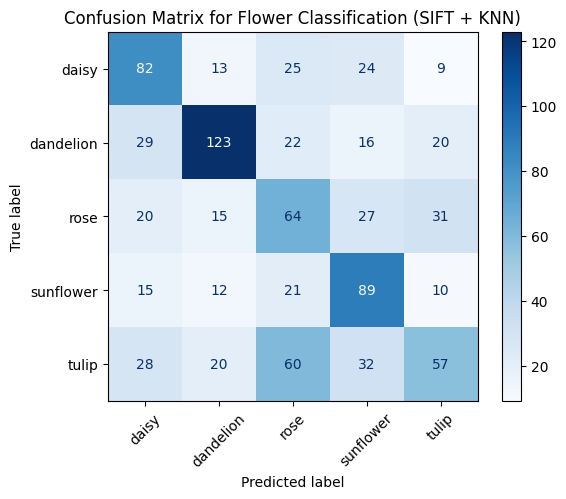

In [2]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Path to the flower dataset
data_path = 'flowers/'

# Initialize lists for features and labels
features = []
labels = []

# Initialize SIFT feature extractor
sift = cv2.SIFT_create()

# Iterate through each flower folder
for flower_class in os.listdir(data_path):
    folder_path = os.path.join(data_path, flower_class)
    if not os.path.isdir(folder_path):
        continue

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect and compute SIFT descriptors
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        if descriptors is not None:
            # Use mean of descriptors to represent the image
            features.append(np.mean(descriptors, axis=0))
            labels.append(flower_class)

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, stratify=labels, random_state=42
)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix for Flower Classification (SIFT + KNN)")
plt.show()


Flower classes: ['tulip', 'daisy', 'sunflower', 'dandelion', 'rose']
Total images loaded: 4317


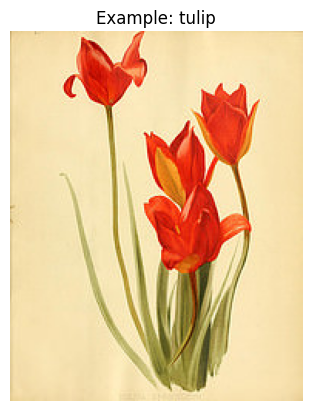

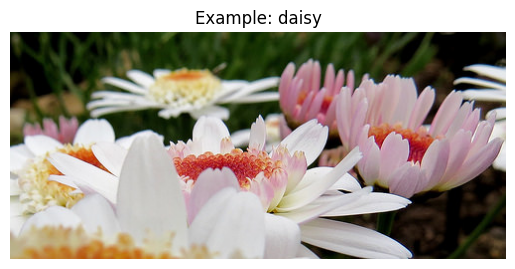

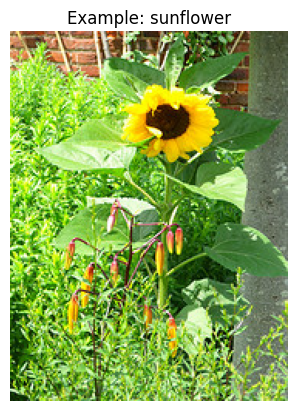

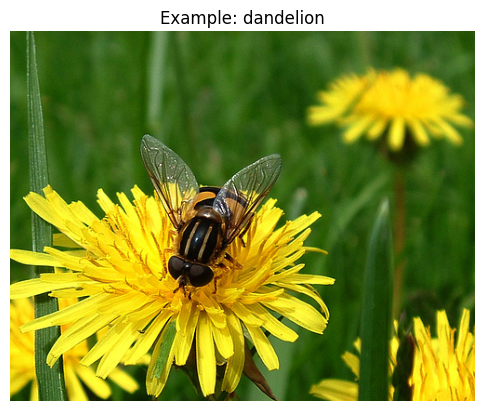

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the main dataset folder
data_path = 'flowers/'

# Get class names (each subfolder = one class)
classes = os.listdir(data_path)
print("Flower classes:", classes)

# Initialize lists for images and labels
images = []
labels = []

# Loop through each class folder
for flower_class in classes:
    folder_path = os.path.join(data_path, flower_class)
    if not os.path.isdir(folder_path):
        continue
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        images.append(img)
        labels.append(flower_class)

print(f"Total images loaded: {len(images)}")

# Display one sample image per class
for flower_class in classes:
    folder_path = os.path.join(data_path, flower_class)
    sample_img = cv2.imread(os.path.join(folder_path, os.listdir(folder_path)[0]))
    plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Example: {flower_class}")
    plt.axis("off")
    plt.show()
